## Section 4
### Decision Trees

Decision Trees are Supervised Machine learning Algorithm, scikit-learn uses the CART algorithm.
CART can be used for Classification and regression

## CART Trees
The representation for the CART model is a binary tree.It only gives two outputs from the node (True or False)

<img src="CART_TREE.png">

##### Quick Example
The following code trains a DecisionTreeClassifier on the iris dataset

In [8]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

export_graphviz( #Export a decision tree in DOT format
tree_clf,
out_file="iris_tree.dot",
feature_names=iris.feature_names[2:],
class_names=iris.target_names,
rounded=True,
filled=True
)

In [9]:
import pydot

(graph,) = pydot.graph_from_dot_file('iris_tree.dot')
graph.write_png('iris_tree.png')


<img src="iris_tree.png">

####  How prediction works:
Suppose you find an iris flower and you want to classify it.

You start at the root node (depth 0, at the top): this node asks whether the flower’s petal length is smaller than 2.45 cm or its petal width <=0.8
1. If it is, then you move down to the root’s left child node (depth 1, left). In this case, it is a leaf node setosa class.
2. If it is not (petal length is greater than 2.45 cm) : You must move down to the root’s right child node (depth 1, right) which is not a leaf node.
3. It asks anotherquestion: is the petal width smaller than 1.75 cm?
4. If it is, Then go to the next level to the left which is a leaf node versicolor class.
5. If it is not, Then go to the next level to the right which is a leaf node virginica class.

#### Nodes calculations:
Each node contain a condition which the question that spearate the data and it have different attributes to calculate such as samples, value, and gini.

#### samples
A node’s samples attribute counts how many training instances it applies to. For example. the iris flower dataset contains 150 training samples which are counted at the root. Then, 100 samples have petal length greater than 2.45 cm at level 1 right node. Furthermore, the 100 samples contains 54 versicolor class and 46 virginica class as counted in the right leafs.

#### values
A nodes's Value represents tells you how many training instances of each class this node applies to.for example, the bottom-right node applies to 0 Iris-Setosa, 1 IrisVersicolor, and 45 Iris-Virginica

gini
a node’s gini attribute measures its impurity: a node is pure (gini=0) if all training instances it applies to belong to the same class. For example, since the depth-1 left node applies only to Iris-Setosa training instances, it is pure and its gini score is 0. The following equation calculates score Gi of the ith node:



$$ G_{i} = 1 - \sum_{k=1}^{n} P_{i,k}^{2} $$


Where Pi,kis the ratio of class k instances among the training instances in the ith node.

For example, the depth-2 left node has a gini score equal to $$ 1 – {(0/54)}^{2} – {(49/54)}^{2} – {(5/54)}^{2} ≈ 0.168. $$ 

The following figure shows Decision Tree’s decision boundaries. The thick vertical line represents the decision boundary of the root node (depth 0): petal length = 2.45 cm. Since the left area is pure (only Iris-Setosa), it cannot be split any further. However, the right area is impure, so the depth-1 right node splits it at petal width = 1.75 cm (represented by the dashed line). Since max_depth was set to 2, the Decision Tree stops right there. However, if you set max_depth to 3, then the two depth-2 nodes would each add another decision boundary

<img src="irisGraph.png">


#### Probability Estimation
A Decision Tree can also estimate the probability that an instance belongs to a particular class k: first it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class k in this node. For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide. The corresponding leaf node is the depth-2 left node, so the Decision Tree should output the following probabilities: 0% for Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54), and 9.3% for IrisVirginica (5/54). And of course if you ask it to predict the class, it should output Iris-Versicolor (class 1) since it has the highest probability.

In [10]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [11]:
tree_clf.predict([[5, 1.5]])

array([1])

#### How Can It gets the Split points and the best Feature ???

Creating a CART model involves selecting input variables and split points on those variables until a suitable tree is constructed.

The selection of which input variable to use and the specific split or cut-point is chosen using by minimizing a cost function(i.e  It searches for the pair (feature "k", threshold "tk") that produces the purest subsets). Tree construction ends using a predefined stopping criterion, such as a minimum number of training instances assigned to each leaf node of the tree.

for example: the algorithm first splits the training set in two subsets using a single feature k and a threshold
tk (e.g., “petal length ≤ 2.45 cm”) based on searching for the pair that minimizes the cost function.

#### Cost Function that is minimized in Classification
<img src="Cost_fun_class.png">

### CART for Regression

#### Cost Function that is minimized in Regression
<img src="Cost_fun_regression.png">

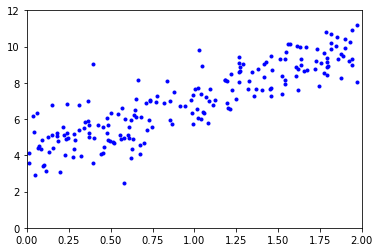

In [12]:
import numpy as np
np.random.seed(42)
L = 2 * np.random.rand(200, 1)
F = 4 + 3 * L + np.random.randn(200, 1)
import matplotlib.pyplot as plt
plt.plot(L, F, "b.")
plt.axis([0, 2, 0,12 ])
plt.show()

In [13]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(L, F)

DecisionTreeRegressor(max_depth=2)

In [14]:
export_graphviz( #Export a decision tree in DOT format
tree_reg,
out_file="regression_tree.dot",
rounded=True,
filled=True
)
import pydot

(graph,) = pydot.graph_from_dot_file('regression_tree.dot')
graph.write_png('regression_tree.png')

<img src='regression_tree.png'>

Value Here is The prediction which is simply the average target value of the training
instances associated to this leaf node.

In [15]:
X=np.array([[1.6], [0.1]])
Y_predict =tree_reg.predict(X)

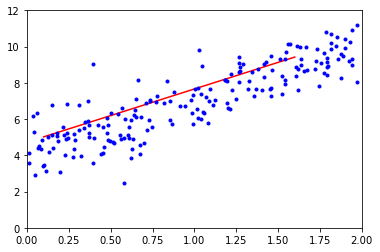

In [16]:
plt.plot(X, Y_predict, "r-")
plt.plot(L, F, "b.")
plt.axis([0, 2, 0,12 ])
plt.show()

### Regularization Hyperparameters
The DecisionTreeClassifier and DecisionTreeRegressor class has a few other parameters that similarly restrict
the shape of the Decision Tree: 
* min_samples_split (the minimum number of samples a node must have before it can be split)
* min_samples_leaf (the minimum number of samples a leaf node must have)
* max_leaf_nodes (maximum number of leaf nodes)

###### Effect of Regularizing a Decision Tree regressor
<img src="Regularized.PNG">

##### Bias and Variance
<img src="Bias_Variance_SquigglyLine.png">

<img src="Bias_VarianceLinearRegression.png">

###### Ridge and Lasso Regression
Linear Regression Regularization:A good way to reduce overfitting is to regularize the model 

Both models adds a regularization term to the cost function

For a linear model, regularization is typically achieved by constraining the weights of
the model. Ridge Regression and Lasso Regression are examples, which implement two different ways to constrain the weights

example: if the two red are the training data and the green dots are the testing data, then if we use a Linear regression model the red line will be the fitted model
<img src="LinearRegression.png">

###### Ridge Regression :

what if we used different cost function for minimization
Cost function: J($\theta$) = MSE+$\lambda$ $slope^2$

The slope decreases as:
$slope_{new}$= $slope_{old}$-learningRate*gradients

[Please see this link for more mathematical info](https://www.kaggle.com/residentmario/ridge-regression-cost-function)


since now the gradient is bigger then the slope is smaller.


Note that: the blue line is RidgeRegression line, so we permitted some bias in order to decrease the variance 
<img src="RidgeVsLinearRegression_2.png">


As lambda increase the slope decrease
<img src="DecreaseSlopeAsLambdaIncrease.png">

###### Lasso Regression (Least Absolute Shrinkage and Selection Operator Regression):
Lasso regression is the same as the Ridge regression but its cost function 
Cost function: J($\theta$) = MSE+$\lambda$ $slope$

An important characteristic of Lasso Regression is that it tends to completely eliminate
the weights of the least important features (i.e., set them to zero) but in case of Ridge regression the reguralized minimum get closer to zero but not equal zero.

[Link](https://youtu.be/z8otLG2cJVg)